<a href="https://colab.research.google.com/github/Gaurav-Bindal/Hotel-Booking-Analysis/blob/main/Capstone_Project_1__Hotel_Booking_Analyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Analysis**



Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

# Loading Libraries and CSV

In [1]:
# Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import plotly.express as px
sns.set_theme(style="whitegrid")

In [2]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the Hotel booking dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project 1_Hotel booking analysis/Hotel Bookings.csv')

# Data Reading and Inspection

In [5]:
# Looking at the data using head()
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Checking shape od dataset
df.shape

(119390, 32)

In [7]:
# Exploring columns of dataset using describe function
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# Checking all columns names of dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# Checking the dataset for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Cleaning (Removing Null values)

In [10]:
# Total null values in dataset
df.isnull().sum().sum()

129425

In [11]:
# checking for null values
null = pd.DataFrame({'Null Values' : df.isnull().sum(), 'Percentage Null Values' : (df.isnull().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


### By analysing the datset for null values, we see that we have null values in 4 columns (children, country, agent, company). So we will treat these 4 columns to remove null values.

In [12]:
# Treating the above mentioned 4 columns to remove null values
df['children'].fillna(df['children'].mean(),inplace=True)
df['country'].fillna("no country",inplace=True)
df['agent'].fillna("0",inplace=True)
df['company'].fillna("0",inplace=True)

### Now we have clean dataset without any null values.

In [13]:
# Checking dataset for any null values
null = pd.DataFrame({'Null Values' : df.isnull().sum(), 'Percentage Null Values' : (df.isnull().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.0
is_canceled,0,0.0
lead_time,0,0.0
arrival_date_year,0,0.0
arrival_date_month,0,0.0
arrival_date_week_number,0,0.0
arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,0,0.0
stays_in_week_nights,0,0.0
adults,0,0.0


## Data Exploration

### Through data exploration, we analysed that certain bookings are made with 0 adults, 0 children and 0 babies, which doesn't make any sense. These might be due to system failure or software error at the time of booking. So we decided to remove those entries from our dataset.

In [14]:
# Checking the entries where adults, babies and children are zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0,0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


### We have 180 such rows where adults, children and babies all are zero.

In [15]:
# Removing those rows having adults, children and babies - all zero at same time
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Let’s plot the heatmap and see the correlation between different parameters

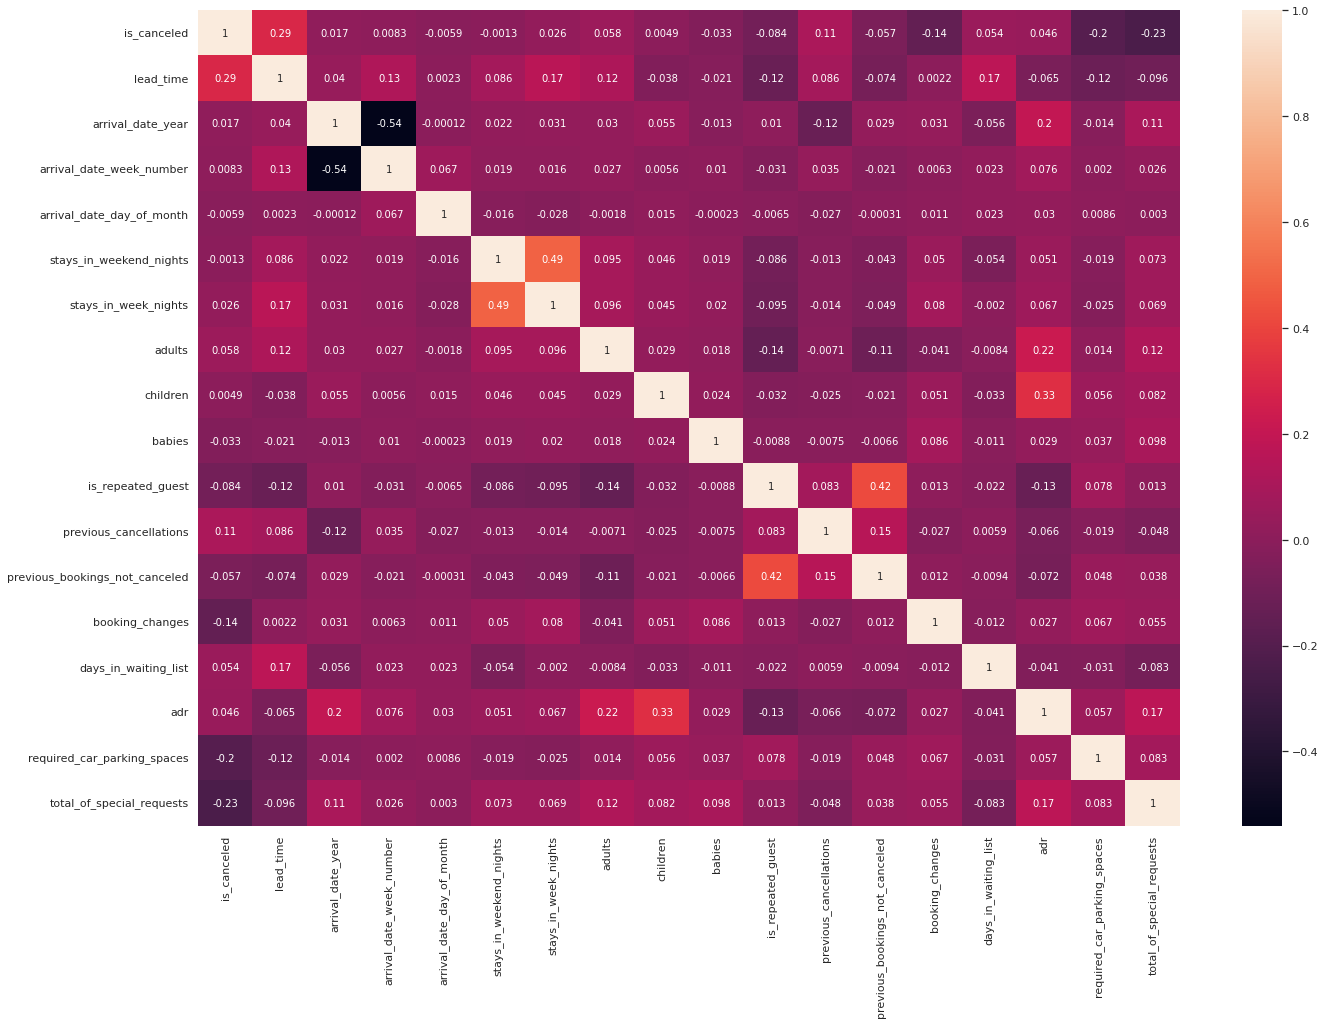

In [16]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df.corr(), annot=True, ax=ax);

### Heatmap depicts that there's no correlation between parameters.

# Ques 1. How many bookings were made in different types of hotels?


In [17]:
# Bookings made in different type of hotels
print('Total Bookings')
print(df.hotel.value_counts())

Total Bookings
City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64


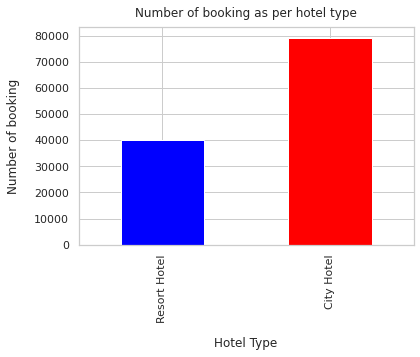

In [18]:
# Showing the bookings for City and Resort hotel by a bar graph
df['hotel'].value_counts(sort=False).plot(kind='bar', color=['blue', 'red'])

plt.xlabel("Hotel Type", labelpad=14)
plt.ylabel("Number of booking", labelpad=14)
plt.title("Number of booking as per hotel type", y=1.02);

### There are two types of hotels in our dataset : City hotel and Resort hotel. We explore from here that almost 40000 bookings are made for Resort hotel while almost 80000 bookings are done for City hotel, which is almost double of the bookings at Resort hotel.

### So, we can conclude from here that most people prefers to stay in City hotel as compared to Resort hotel.

# Ques 2. HOW MANY PEOPLE HAVE CANCELLED THERE BOOKINGS?

In [19]:
# Getting total number of bookings and number of bookings which got cancelled & which were not cancelled (And theri percentage as well)
booking = list(df.is_canceled.value_counts())
total_booking = sum(booking)
print(f'Total Bookings: {total_booking}')
print(f'bookings_not_cancelled = {booking[0]}')
print(f'bookings_cancelled = {booking[1]}')

booking_percent = list(df.is_canceled.value_counts(normalize=True))

print('\n')
print(f'Percentage of booking not cancelled: {booking_percent[0]}')
print(f'Percentage of booking cancelled: {booking_percent[1]}')

Total Bookings: 119210
bookings_not_cancelled = 75011
bookings_cancelled = 44199


Percentage of booking not cancelled: 0.629234124653972
Percentage of booking cancelled: 0.370765875346028


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


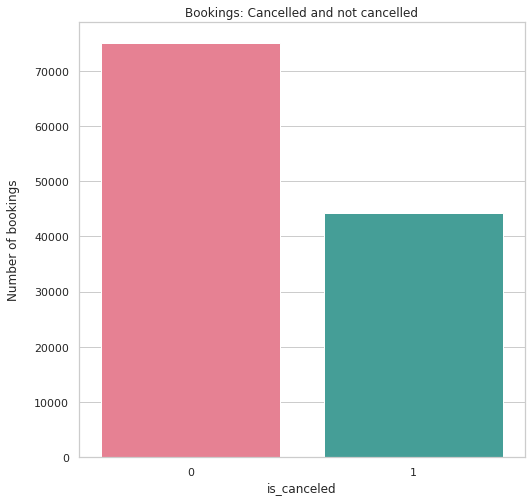

In [20]:
# Showing the bookings which got cancelled and which were not cancelled by a bar graph
plt.figure(figsize=(8,8))

#Canceled=1, Not canceled= 0
sns.countplot(df['is_canceled'], palette='husl').set_title ('Bookings: Cancelled and not cancelled')
plt.ylabel("Number of bookings", labelpad=14)
plt.show()

#### Here 0 represents Bookings which were not cancelled & 1 represents Cancelled Bookings

**We can observe from the analysis that bookings got canceled 37% of the time. While booking guest did checked-in (did not cancel the booking) almost 63% of the time.**

In [21]:
# Creating a dataframe for booking which were canceled and which were not cancelled as per the hotel type
total_booking_canceled = df.groupby(['hotel','is_canceled'], as_index=False).size()
total_booking_canceled.rename(columns={"size": "cancelled booking"}, inplace=True)
total_booking_canceled['percentage'] = round(total_booking_canceled['cancelled booking'] / total_booking * 100, 2)
total_booking_canceled

,hotel,is_canceled,cancelled booking,percentage
0,City Hotel,0,46084,38.66
1,City Hotel,1,33079,27.75
2,Resort Hotel,0,28927,24.27
3,Resort Hotel,1,11120,9.33


Text(0, 0.5, 'Number of booking')

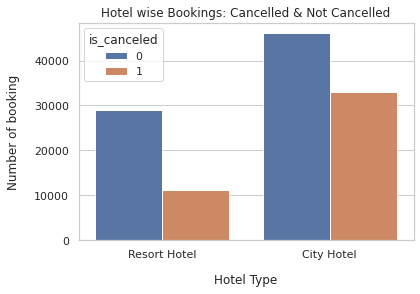

In [22]:
# Showing the hotel wise booking cancellation graphically
sns.countplot (x= 'hotel', data= df,hue= 'is_canceled').set_title ('Hotel wise Bookings: Cancelled & Not Cancelled')
plt.xlabel("Hotel Type", labelpad=14)
plt.ylabel("Number of booking", labelpad=14)

## So we can analyse that althogh there are more bookings in City hotel but also the number of cancellations are also high in City hotel as compared to Resort hotel.

# Now, exploring our dataset, we analysed that out of total bookings done, a lot of bookings are cancelled. So to analyse the data for those who really showed up, there is no point of analysing the data of those who cancelled their bookings. So we decided to create a new dataframe only for those bookings who didn't cancel their bookings.

# Ques 3. In which hotel most guests are actually staying?

In [23]:
# Creating a dataframe which only includes people who have arrived
hotel_arrival=df[df['is_canceled'] == 0]
hotel_arrival.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


labels:['City Hotel', 'Resort Hotel']


sizes:[46084, 28927]




([<matplotlib.patches.Wedge at 0x7f947c3a0b50>,
 [Text(-1.0297641745211839, -0.386763163800154, 'City Hotel'),
  Text(1.123379059974326, 0.4219235565966899, 'Resort Hotel')],
 [Text(-0.5616895497388276, -0.2109617257091749, '61.4%'),
  Text(0.65530445165169, 0.2461220746814024, '38.6%')])

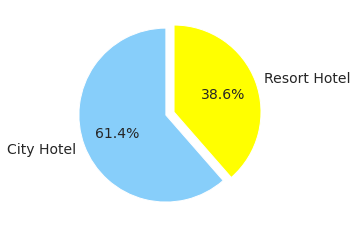

In [24]:
# Creating a Pie chart showing percentage of guests who actually stayed in these two hotels

# Creating labels for the pie chart
labels = hotel_arrival['hotel'].value_counts().index.tolist()
print(f'labels:{labels}')
print("\n")
# Convert value counts to list
sizes = hotel_arrival['hotel'].value_counts().tolist()
print(f'sizes:{sizes}')
print("\n")

# Explode determines how much each section is separated from each other
explode = (0, 0.1)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

**From above data exploration, we can clearly see that almost 46000 (61.4%) guests have stayed in City hotels while almost 29000 (38.6%) have actually stayed in Resort hotels. So we can say that among the people who stay at hotels, city hotel is a more common choice.**

# Quse 4. From which country most guests are coming ?

In [25]:
# get the total number of hotel guests
total_guests = hotel_arrival['country'].value_counts().sum()
#counting the number of guests based on country
country_wise_guests = hotel_arrival['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
# add the proportion column
country_wise_guests['percentage'] = round(country_wise_guests['No of guests'] / total_guests * 100, 2)
country_wise_guests

,country,No of guests,percentage
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


Text(0, 0.5, 'Percentage of Guests')

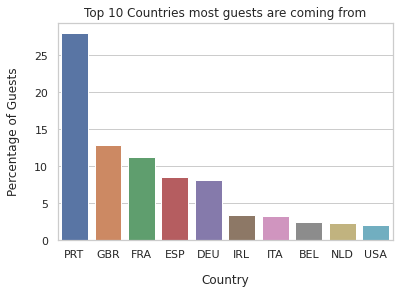

In [26]:
# Bar plot of the top 10 countries from where most guests come from
sns.barplot(x="country", y="percentage", data=country_wise_guests[0:10]).set_title ('Top 10 Countries most guests are coming from')
plt.xlabel("Country", labelpad=14)
plt.ylabel("Percentage of Guests", labelpad=14)

**From above analysis, we can see that people from all over the world are staying in these two hotels. Most of the guests come from Portugal (almost 28%), followed by Great Britain (almost 13%), France (11.3%) and other countries.**

**We can also see that most tourists come from European contries only.**

# Ques 5. IN WHICH YEAR MOST GUESTS ARRIVE?

In [27]:
# Counting the number of guests and their percentage in each year
year = hotel_arrival.groupby(['arrival_date_year'],as_index=False).size()
year.rename(columns={"size": "number_of_guest"}, inplace=True)
year['percentage'] = round(year['number_of_guest'] / total_guests * 100, 2)
year

,arrival_date_year,number_of_guest,percentage
0,2015,13826,18.43
1,2016,36299,48.39
2,2017,24886,33.18


Text(0, 0.5, 'Percentage of Guests')

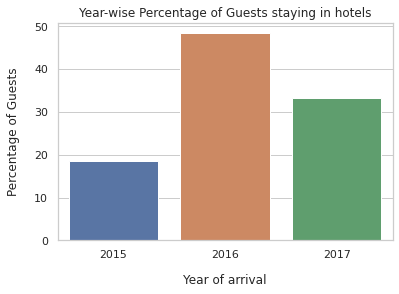

In [28]:
# Plotting the year wise data of guests graphically
sns.barplot(x="arrival_date_year", y="percentage", data=year).set_title ('Year-wise Percentage of Guests staying in hotels')
plt.xlabel("Year of arrival", labelpad=14)
plt.ylabel("Percentage of Guests", labelpad=14)


**Thus we can see that guests were increased by more than 1.5 times in 2016 compared to 2015. But then decreased by almost 15% the next year. The data depicts that almost 50% guests have stayed in hotels in 2016 alone, that means 2016 has been a good year for hotels for their revenue.**

###Let’s analyse the guests staying in each hotel for these 3 years graphically. 

Text(0, 0.5, 'Number of Guests staying')

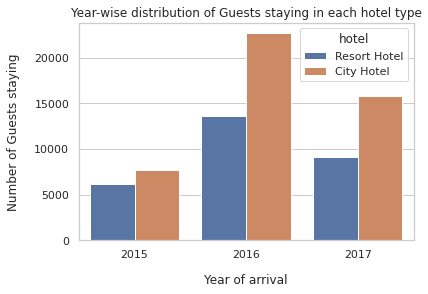

In [29]:
# Plotting Guests staying in each hotel type for 3 years
sns.countplot(x='arrival_date_year', hue='hotel', data=hotel_arrival).set_title ('Year-wise distribution of Guests staying in each hotel type')
plt.xlabel("Year of arrival", labelpad=14)
plt.ylabel("Number of Guests staying", labelpad=14)

### Thus we can see that No. of guests staying in City hotel remains higher than no. of people staying in resort hotels each year.

# **Ques 6. IN WHICH MONTH MOST GUESTS ARRIVE?**

In [30]:
# Creating separate dataframes for Resort and City Hotel to find their total number of guests per month
resort_hotel = hotel_arrival[(hotel_arrival['hotel'] == 'Resort Hotel')]
city_hotel = hotel_arrival[(hotel_arrival['hotel'] == 'City Hotel')]

In [31]:
# Getting month wise guests in Resort hotel
resort_guests = resort_hotel['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [32]:
# Getting month wise guests in City hotel
city_guests = city_hotel['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [33]:
# Merging these two dataframes on 'month' column and creating a new dataframe
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [34]:
# Sorting order for desired output (Month wise)
sort_order=['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [35]:
# Sorting the merged datframe month wise
final_guests.index=pd.CategoricalIndex(final_guests['month'],categories=sort_order,ordered=True)
final_guests.sort_index()


,month,no of guests in resort,no of guest in city hotel
month,,,
January,January,1866,2249
February,February,2308,3051
March,March,2571,4049
April,April,2550,4010
May,May,2535,4568
June,June,2037,4358
July,July,3137,4770
August,August,3257,5367
September,September,2102,4283


In [36]:
# Plotting No. of guests per month for each hotel
px.line(final_guests.sort_index(), x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of Guests per Months', template = 'none')

### It can seen from the above graph that City hotel has the highest number of guests in the month of August, and Resort hotel also have maximum guests in July and August months.

### It can also be seen that there is very lean period for both type of hotels in winter season, December and January. 

### Both hotels have moderate number of guests from February to May and in months of September and October.

# **Ques 7. How does the price vary per month over the year?**

## To analyse price variation over the year, we will explore 'adr' column of the dataset.

## ADR stands for average daily rate, and it is used to measure the average revenue that a hotel receives for each occupied guest room per day.

In [37]:
# Creating separate dataframes for Resort and City Hotel to find adr per month
resort_hotel = hotel_arrival[(hotel_arrival['hotel'] == 'Resort Hotel')]
city_hotel = hotel_arrival[(hotel_arrival['hotel'] == 'City Hotel')]

In [38]:
# Getting Mean adr per month for resort hotel
resort_hotel_adr = resort_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel_adr

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [39]:
# Getting Mean adr per month for city hotel
city_hotel_adr=city_hotel.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel_adr

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [40]:
# Merging these two dataframes on 'month' column and creating a new dataframe
final_hotel_adr = resort_hotel_adr.merge(city_hotel_adr, on = 'arrival_date_month')
final_hotel_adr.columns = ['month', 'adr_resort_hotel', 'adr_city_hotel']
final_hotel_adr

,month,adr_resort_hotel,adr_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


Now we observe here that month column is not in order, and if we visualize we will get improper conclusions. So first we have to sort the months

In [41]:
# Creating a sortig order to sort the datframe month wise
sort_order=['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [42]:
# Sorting the dataframe month wise
final_hotel_adr.index=pd.CategoricalIndex(final_hotel_adr['month'],categories=sort_order,ordered=True)
final_hotel_adr.sort_index()

,month,adr_resort_hotel,adr_city_hotel
month,,,
January,January,48.761125,82.330983
February,February,54.147478,86.520062
March,March,57.056838,90.658533
April,April,75.867816,111.962267
May,May,76.657558,120.669827
June,June,107.974850,117.874360
July,July,150.122528,115.818019
August,August,181.205892,118.674598
September,September,96.416860,112.776582


In [43]:
# Plotting adr per month for each hotel
px.line(final_hotel_adr.sort_index(), x = 'month', y = ['adr_resort_hotel','adr_city_hotel'],
        title='Average revenue for each occupied guest room over the Months', template = 'none')

### This plot clearly shows that monthly average revenue starts increasing from month of March for both the hotels.

### Monthly average revenue of city hotel doesn't vary much and is almost constant for most of the year. So during summer season, it costs around $110 - 120 to book a room in city hotel.

### Monthly average revenue in the Resort Hotel are much higher during the summer, specially in the months of July and August, where price of 1 room reaches a whooping $180. 

### The average price to book a room in resort hotels during summers is around $120.

**We see here that hotel prices varies a lot over the months. This is mot probably due to seasonal factors that people like to go on vacations in summers mostly. But hotel room price is affected a lot by certain other factors, like room types or meal arrangements and so on. So let's dive deeper and analyse a few other factors affecting hotel room prices.**

## **Quse 8. How much do guests pay per night for different types of rooms?**

In [44]:
# Just inspecting the data
hotel_arrival.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [45]:
# Graphically showing average revenue per day for different types of rooms through a box plot
px.box(data_frame = hotel_arrival, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

**The figure shows that the average room price per day depends on its type and the price for each room type varies depending on some other parameters.**

### For most of the room types, average price per day of city hotels is generally higher than average price of resort hotels.

### For "A" type rooms, average room price per day is around 60 - 95 dollar, but sometimes it goes to very high cost of $500.

### City hotels do not have "H" and "L" rooom types.

# **Ques. 9. Popular Market Segment used by customers for hotel booking?**

### Market segment designation. 
#### In categories,

*   “TA” means “Travel Agents”
*   “TO” means “Tour Operators



Text(0, 0.5, 'Number of bookings')

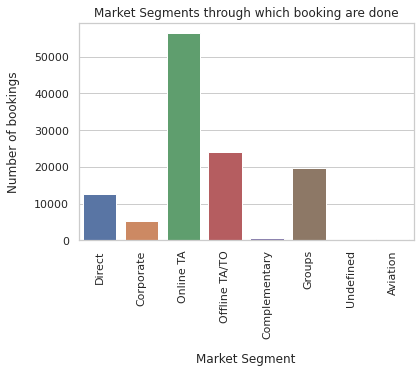

In [46]:
# Graphically represnting the popular market segments through which hotel bookings are done
sns.countplot (x= 'market_segment', data= df).set_title ('Market Segments through which booking are done')
plt.xticks(rotation = 90)
plt.xlabel("Market Segment", labelpad=14)
plt.ylabel("Number of bookings", labelpad=14)

Text(0, 0.5, 'Number of bookings')

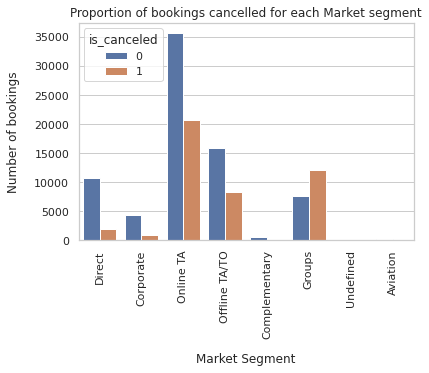

In [47]:
# Graphically represnting how many bookings got cancelled for each market segment
sns.countplot (x= 'market_segment', data= df,hue= 'is_canceled').set_title ('Proportion of bookings cancelled for each Market segment')
plt.xticks(rotation = 90)
plt.xlabel("Market Segment", labelpad=14)
plt.ylabel("Number of bookings", labelpad=14)

### From the graph, we can clearly see that maximum bookings are done through Online and Offline Travel Agents, but these bookings have high cancellation rate as well.

### Maximum hotel bookings are done through 'Online Travel Agents' but it is also clearly evident that maximum cancellations are in same segment as well. Cancellations in 'Online TA' is almost 36% and in 'Offline TA' is around 33%.

### We can also see that although 'Direct' and 'Corporate' segments have very less bookings but their cancellation rate is also very low.

### For 'Group' segment, most than 50% of the bookings get cancelled.

In [48]:
# Creating a dataframe for number of guests from each market segment in City & Resort hotels

#counting the number of guests by segment and hotel
market_segment = hotel_arrival.groupby(['hotel', 'market_segment'], as_index=False).size()

# rename a column
market_segment.rename(columns={"size": "number_of_guest"}, inplace=True)

# get the percentage
market_segment['percentage'] = round(market_segment['number_of_guest'] / total_guests * 100, 2)

market_segment

,hotel,market_segment,number_of_guest,percentage
0,City Hotel,Aviation,183,0.24
1,City Hotel,Complementary,471,0.63
2,City Hotel,Corporate,2337,3.12
3,City Hotel,Direct,5016,6.69
4,City Hotel,Groups,4339,5.78
5,City Hotel,Offline TA/TO,9546,12.73
6,City Hotel,Online TA,24192,32.25
7,Resort Hotel,Complementary,168,0.22
8,Resort Hotel,Corporate,1954,2.60
9,Resort Hotel,Direct,5632,7.51


Text(0, 0.5, 'Number of guests staying')

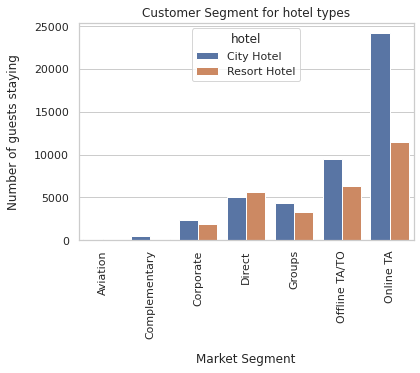

In [49]:
# Graphically representing number of guests from each market segment in City & Resort hotels
sns.barplot(x="market_segment", y="number_of_guest",hue='hotel', data=market_segment).set_title ('Customer Segment for hotel types')
plt.xticks(rotation = 90)
plt.xlabel("Market Segment", labelpad=14)
plt.ylabel("Number of guests staying", labelpad=14)

**Inference: Indirect bookings through online and offline travel agents are higher compared to direct bookings & group bookings.**


*  The major market segment for both hotels is Online Travel Agency (47.56%), followed by Offline Travel Agency or Travel Operator (21.17%).
*  City Hotel has a higher number of guests from all market segments except for the direct segment which gives more customers to resort hotels.



# Ques 10. WHAT TYPE OF MEAL GUESTS PREFER MOST?

Meal Type of meals booked. 

Categories are presented in standard hospitality meal packages:

*   Undefined/SC — no meal package; 
*   BB — Bed & Breakfast;
*   HB — Half board (breakfast and one other meal — usually dinner);
*   FB — Full board (breakfast, lunch and dinner)

In [50]:
# Counting the number of meals of each type for guests staying in hotels
hotel_arrival.meal.value_counts()

BB           57730
HB            9475
SC            6603
Undefined      883
FB             320
Name: meal, dtype: int64

In [51]:
# Getting the meals in form of percentage
hotel_arrival.meal.value_counts(normalize=True)

BB           0.769620
HB           0.126315
SC           0.088027
Undefined    0.011772
FB           0.004266
Name: meal, dtype: float64

Text(0, 0.5, 'Number of meals')

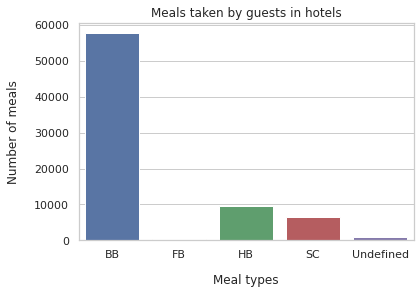

In [52]:
# Graphically showing the number of meals of each type for guests staying in hotels
sns.countplot (x= 'meal', data= hotel_arrival).set_title ('Meals taken by guests in hotels')
plt.xlabel("Meal types", labelpad=14)
plt.ylabel("Number of meals", labelpad=14)

**From the graph, it can be clearly concluded that Bead and Breakfast (BB) is the most common meal basis encountered in hotels which is almost 79%, followed by Half Board (HB).**

# Ques. 11. HOW MANY GUEST REQUIRED PARKING?


In [53]:
# Getting total car parkings required by guests
hotel_arrival['required_car_parking_spaces'].sum()

7457

Text(0, 0.5, 'Number of guests requiring Parking spaces')

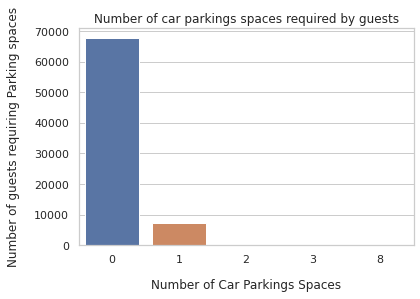

In [54]:
# Plot of number of car parkings required by guests
sns.countplot (x= 'required_car_parking_spaces',data= hotel_arrival).set_title ('Number of car parkings spaces required by guests')
plt.xlabel("Number of Car Parkings Spaces", labelpad=14)
plt.ylabel("Number of guests requiring Parking spaces", labelpad=14)

### We can see from graph that majority of the guests do not require a car parking, only a few guests (around 7000) need parking space for ony 1 car. There are only a few guests who need car parking spaces for 2 or 3 cars.

# **Ques 12. How many guests stay at same hotel again?**

In [55]:
# Creating a dataframe for guests who repeated their stay and those who didn't repeat their stay at both types of hotels
repeated_guest = hotel_arrival.groupby(['hotel','is_repeated_guest'],as_index=False).size()
repeated_guest.rename(columns={"size": "number_of_guest"}, inplace=True)
repeated_guest['percentage'] = round(repeated_guest['number_of_guest'] / total_guests * 100, 2)
repeated_guest

,hotel,is_repeated_guest,number_of_guest,percentage
0,City Hotel,0,44546,59.39
1,City Hotel,1,1538,2.05
2,Resort Hotel,0,27260,36.34
3,Resort Hotel,1,1667,2.22


### Here 0 represents Number of guests who did not repeat their stay at hotel & 
### 1 represents Number of guests who repeated their stay at hotel

Text(0, 0.5, 'Number of guests repeating their stay')

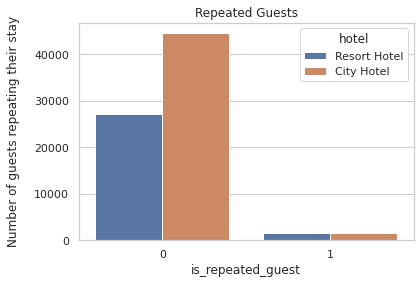

In [56]:
# Graphically represnting guests who repeated their stay and those who didn't repeat their stay at both types of hotel
sns.countplot (x= 'is_repeated_guest', data= hotel_arrival,hue= 'hotel').set_title ('Repeated Guests')
plt.ylabel("Number of guests repeating their stay", labelpad=14)

Insights from the graph:

1) There are few repeated customer - Less than 5% of visitors

2) Percentage of repeated customers in both hotels is almost same

# Ques 13. Reservation status of guests?

Reservation last status, assuming one of three categories:

1) Canceled — booking was canceled by the customer;


2) Check-Out — customer has checked in but already departed;


3) No-Show — customer did not check-in and also didn't inform the hotel


In [57]:
# Creating a dataframe to get the reservation status of all guests who made a booking at these hotels
# Here we are using original dataset (df), including cancelled bookings as well

status=df.groupby(['reservation_status']).agg('count').reset_index()
status=status.iloc[:, :2]
status = status.rename(columns={'hotel':'Number of guest'})
status['percentage'] = round(status['Number of guest'] / status['Number of guest'].sum() * 100, 2)
status

,reservation_status,Number of guest,percentage
0,Canceled,42993,36.06
1,Check-Out,75011,62.92
2,No-Show,1206,1.01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



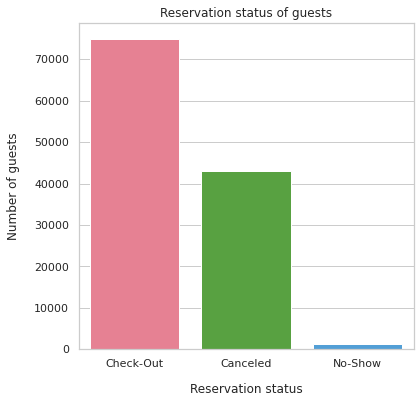

In [58]:
# Graphically representing the reservation status of all guests who made a booking at these hotels
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl').set_title ('Reservation status of guests')
plt.xlabel("Reservation status", labelpad=14)
plt.ylabel("Number of guests", labelpad=14)
plt.show()

### From the above analysis, we see that there are 1% customers who made the booking at the hotel but didn't check-in and also didn't inform the hotel that they are not arriving.

### Also, 36% of customers cancelled their bookings.

# **Ques 14. Booking percentage for different room types ?**

In [59]:
# Getting the booking proportion for each room type
hotel_arrival.reserved_room_type.value_counts(normalize=True)

A    0.696538
D    0.174348
E    0.061471
F    0.026849
G    0.017717
B    0.009972
C    0.008305
H    0.004746
L    0.000053
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



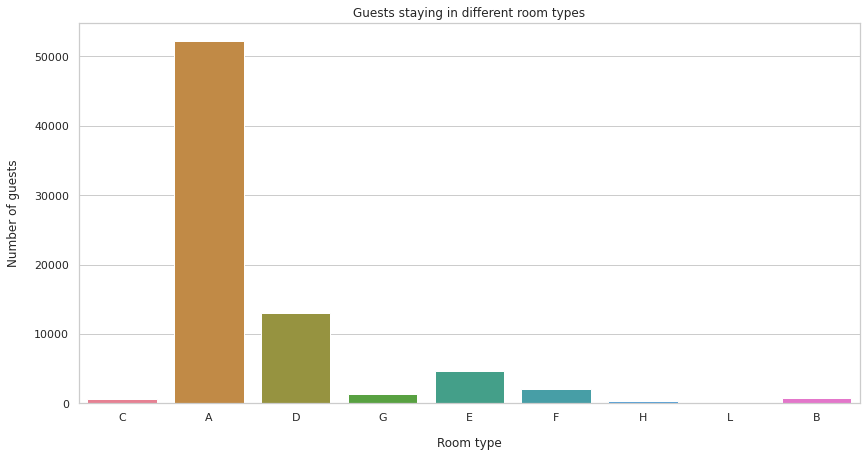

In [60]:
# Graphically representing the booking proportion for each room type
plt.figure(figsize=(14,7))
sns.countplot(hotel_arrival['reserved_room_type'], palette='husl').set_title ('Guests staying in different room types')
plt.xlabel("Room type", labelpad=14)
plt.ylabel("Number of guests", labelpad=14)
plt.show()

### Thus the graph clearly depicts that 70% of the customers prefer to book 'A' type of rooms, and 17% customers prefer to book 'D' type of rooms.

# **Ques 15. Deposit made at the time of booking?**

Regarding deposit, there are three options available to customers at the time of booking. The options are:

No Deposit — no deposit was made;

Non Refundable — a deposit was made which won't be refunded in case of cancellation;

Refundable — a deposit was made which would be refunded in case of cancellation.


In [61]:
# Getting the proportion for each deposit option
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876277
Non Refund    0.122364
Refundable    0.001359
Name: deposit_type, dtype: float64

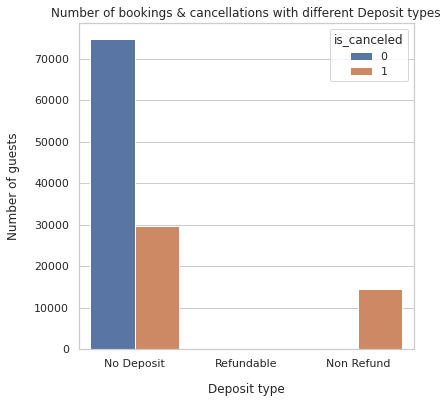

In [62]:
# Graphically representing proportion for each deposit option
plt.figure(figsize=(6,6))
sns.countplot (x= 'deposit_type', data= df,hue= 'is_canceled').set_title ('Number of bookings & cancellations with different Deposit types')
plt.xlabel("Deposit type", labelpad=14)
plt.ylabel("Number of guests", labelpad=14)
plt.show()

### Insights from above analysis:

1) Most of the customers prefer to book the room where they do not need to pay any deposit amount, and these type of bookings also gets cancelled the most.

2) The Refundable deposit type bookings are very less, this might be due to fact that generally refundable bookings are generally costlier than non-refundable.

3) There are almost no cancellations with Refundable deposit type bookings, while almost all bookings of Non-refundable deposit type got cancelled.

So, we can conclude that 'Non-refundable' deposit type booking doesn't gaurantee that booking won't get cancelled.

# Ques 16. Lead time versus cancellation?

Text(0, 0.5, 'Average number of cancellations')

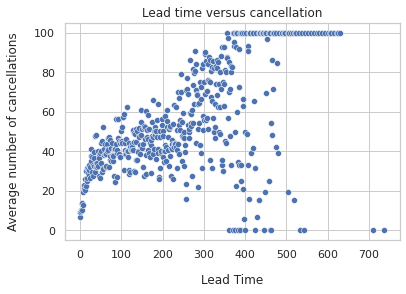

In [63]:
# Lead time versus booking cancelled
a = df.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100).set_title('Lead time versus cancellation')
plt.xlabel("Lead Time", labelpad=14)
plt.ylabel("Average number of cancellations", labelpad=14)

In [64]:
a

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6264.0,0.066571,0.249297,0.0,0.0,0.0,0.0,1.0
1,3445.0,0.092308,0.289502,0.0,0.0,0.0,0.0,1.0
2,2065.0,0.103148,0.304225,0.0,0.0,0.0,0.0,1.0
3,1815.0,0.100275,0.300450,0.0,0.0,0.0,0.0,1.0
4,1710.0,0.102339,0.303182,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


### More the time between booking and check-in date, more are the chances of booking getting cancelled.

# Ques 17. Number of children with guests?

In [65]:
# Guests with children
df.children.value_counts(normalize=True)

0.00000     0.927909
1.00000     0.040777
2.00000     0.030635
3.00000     0.000638
0.10389     0.000034
10.00000    0.000008
Name: children, dtype: float64

Text(0, 0.5, 'Number of guests')

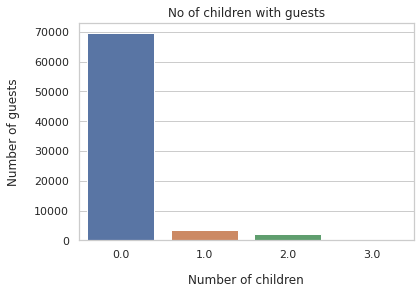

In [66]:
# Graph for number of children with guests
sns.countplot (x= 'children', data= hotel_arrival).set_title ('No of children with guests')
plt.xlabel("Number of children", labelpad=14)
plt.ylabel("Number of guests", labelpad=14)

### More than 92% of guests staying in hotels are without any children. 4% of guests have 1 child and 3% guests have 2 children.

# Ques 18. Different Customer types?

Text(0, 0.5, 'Number of bookings')

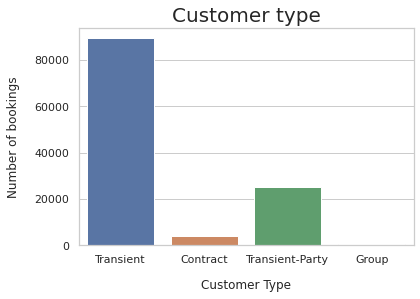

In [67]:
# Representing the count for different customer types
sns.countplot(data = df, x = 'customer_type').set_title('Customer type', fontsize = 20)
plt.xlabel("Customer Type", labelpad=14)
plt.ylabel("Number of bookings", labelpad=14)

### Most of the customers are 'Transient' type.

# Ques 19. Lead time of bookings?

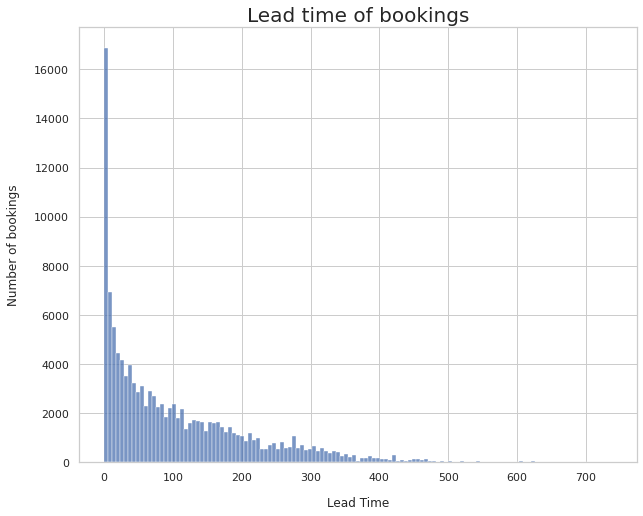

In [68]:
# Plotting histogram for lead time (Number of days between booking day and check-in day)
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="lead_time").set_title('Lead time of bookings', fontsize = 20)
plt.xlabel("Lead Time", labelpad=14)
plt.ylabel("Number of bookings", labelpad=14)
plt.show()

### Most guests book hotels on the same day of check-in. Number of bookings decreases as lead time for bookings increases.

# Ques 20. Box plot for various columns to analyse the outliers?

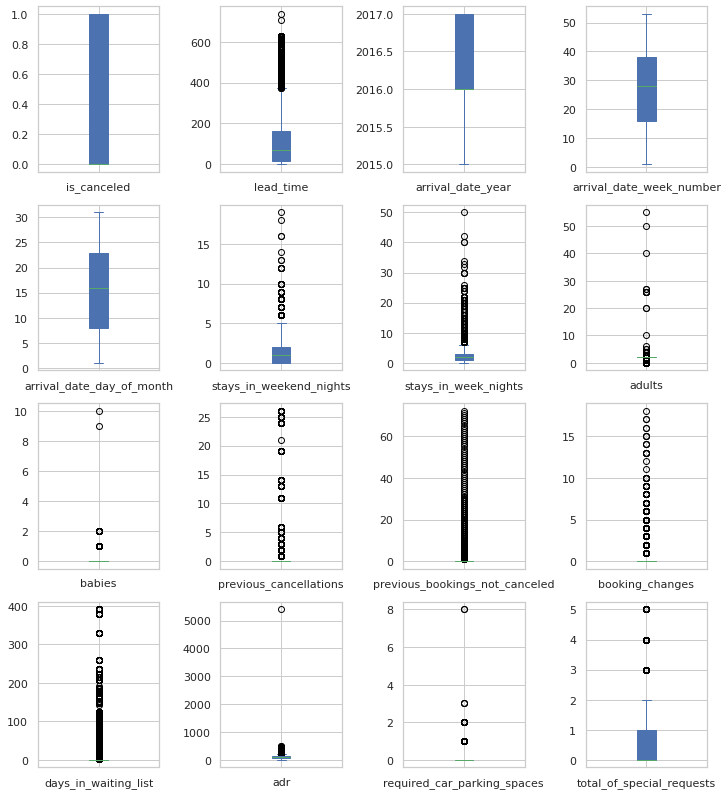

In [69]:
# Graphs showing the mean of each column and outliers for that column
df_to_plot = df.drop(columns=['children', 'is_repeated_guest']).select_dtypes(include=np.number)

# subplots 
df_to_plot.plot(subplots=True,
                layout=(4,4),
                kind='box',
                figsize=(12,14),
                patch_artist=True)
plt.subplots_adjust(wspace=0.5);

# **SUMMARY**

1) Travel Seasonality

We observed that hotel bookings and prices are most affected by seasonality, where number of bookings has steadily increased from February and peaked at August. Peak season for hotels is in months of July and August, whereas hotels have very lean period in months of November to January. This is probably due to the fact that people like to travel in summer season to enjoy the vacations when children have school holidays.

This insight can help the hotels to decide on their advertising & marketing budget, to make proper arrangements for guests and have adequate staff to provide best services. Hotels should advertise more a few months before the summer season when most people plan for their holidays.

2) Largest market segment - Online TA

Our analysis indicates that city hotel is more popular among the guests than resort hotel. Maximum number of bookings are done through Online and Offline Travel Agents. Thus, Hotels should make a decent online profile on travel agency websites to increase sales and also provide promotional discounts to encourage other booking modes.

3) Hotels should focus more on improving their services and making the stay as comfortable and enjoyable for guests as our analysis shows that majority of the customers do not want to repeat their stay at same hotel.

4) Hotels can provide special discounts to couples, as most people travel in group of two, without any children.

5) Most of the guests staying in hotels are from European countries, so hotels should have more promotional events in these countries to attract more customers.

6) Bookings with 'No deposit' type gets cancelled the most, so hotels should charge a minimum deposit at the time of booking.